In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
print(df.head())
print(df.columns)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

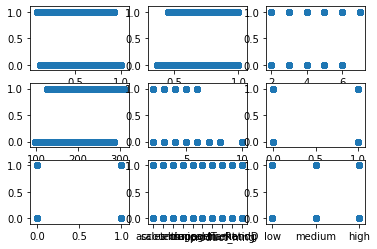

In [3]:
plt.figure()
plt.subplot(331)
plt.scatter(df['satisfaction_level'], df['left'])
plt.subplot(332)
plt.scatter(df['last_evaluation'], df['left'])
plt.subplot(333)
plt.scatter(df['number_project'], df['left'])
plt.subplot(334)
plt.scatter(df['average_montly_hours'], df['left'])
plt.subplot(335)
plt.scatter(df['time_spend_company'], df['left'])
plt.subplot(336)
plt.scatter(df['Work_accident'], df['left'])
plt.subplot(337)
plt.scatter(df['promotion_last_5years'], df['left'])
plt.subplot(338)
plt.scatter(df['Department'], df['left'])
plt.subplot(339)
plt.scatter(df['salary'], df['left'])

In [4]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Satisfaction level, avg monthly hours and promotion in last 5 years plays an important role. 

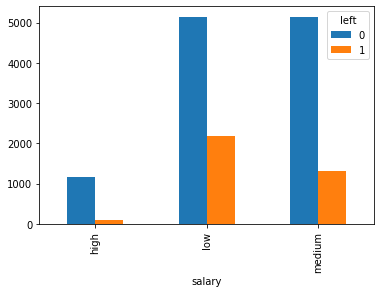

In [8]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

## High salaried people do not usually leave

In [16]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [17]:
pd.crosstab(df.Department, df.left, normalize='index')

left,0,1
Department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


In [18]:
pd.crosstab(df.Department, df.left, normalize='columns')

left,0,1
Department,,
IT,0.083479,0.076449
RandD,0.058278,0.033884
accounting,0.049265,0.057127
hr,0.045852,0.060207
management,0.047165,0.025483
marketing,0.057315,0.056847
product_mng,0.061603,0.055447
sales,0.273539,0.283954
support,0.146482,0.155419


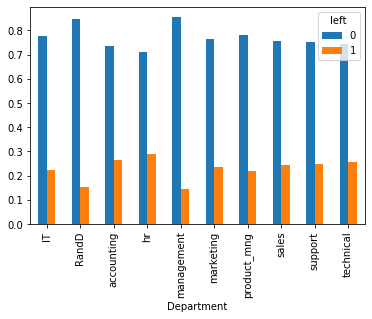

In [19]:
pd.crosstab(df.Department, df.left, normalize='index').plot(kind='bar')

## Department not an important factor, hence ignore it

In [25]:
dummySalary = pd.get_dummies(df['salary'], drop_first='True')
merged = pd.concat([df, dummySalary], axis='columns')

In [37]:
X = merged.drop(columns=['Department', 'salary', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'left'])
y = merged['left']

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X_train, y_train)

/Users/adithyavijaykumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.score(X_train,y_train)

0.7739784741403943

In [64]:
model.score(X_test,y_test)

0.7775555555555556